In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np

This code creates a graph of refractive index with respect to optical angle for a KDP crystal, with a pump photon wavelength of 775 nm and signal and idler photons of wavelength 1550 nm. 

In [2]:
# Setting up wavelength values
lambda_p = 775.0
lambda_s = 1550.0
lambda_i = 1550.0
phi = 0

# Setting Sellmeier coefficients for the ordinary and extraordinary axis of the KDP crystal
KDP_o = [2.259276,13.005522,400,0.01008956,0.012942625]
KDP_e = [2.132668,3.2279924,400,0.008637494,0.012281043]

# Setting up the array of values
theta_o = np.linspace(0,180,num=181)

Define a function for refractive index along a fixed axis of a material, with quantities derived from Sellmeier coefficients as parameters. 

In [3]:
# Assigning values to refractive index along each axis
def axisIndex(wavelength, sellmeier):
    wavelength = wavelength/1000
    n_1 = sellmeier[0]
    n_2 = sellmeier[1]*(wavelength**2)/((wavelength**2)-sellmeier[2])
    n_3 = sellmeier[3]/((wavelength**2)-sellmeier[4])
    return np.sqrt(n_1+n_2+n_3)

Below, we construct the refIndex function to calculate the fast and slow refractive indices of refraction for a photon along a given direction of travel. Here, in accordance with the KDP crystal, we assume two axes with ordinary refractive index and one with extraordinary, so $n_x=n_y=n_o$ and $n_z=n_e$. Then for a photon with direction vector $\hat{s}$, we find the refractive index using the equation

$$ \frac{s_x^2}{n^{-2}(\hat{s})-n_x^{-2}} + \frac{s_y^2}{n^{-2}(\hat{s})-n_y^{-2}} + \frac{s_z^2}{n^{-2}(\hat{s})-n_z^{-2}}. $$

We can rearrange this to obtain a quadratic equation in terms of $x=1/n^2$ of the form 

$$ x^2 - Bx + C = 0 $$

where 

$$ B = s_x^2 \left(\frac{1}{n_y^2} + \frac{1}{n_z^2}\right)+ s_y^2 \left(\frac{1}{n_x^2}+\frac{1}{n_z^2}\right) + s_z^2 \left(\frac{1}{n_x^2}+\frac{1}{n_y^2}\right) $$

and 

$$ C = \frac{s_x^2}{n_y^2n_z^2} + \frac{s_y^2}{n_x^2n_z^2} + \frac{s_z^2}{n_x^2n_y^2}. $$

In [4]:
def refIndex(theta, phi, wavelength, fast):
    theta = np.radians(theta)
    s_x=np.sin(theta)*np.cos(phi)
    s_y=np.sin(theta)*np.sin(phi)
    s_z=np.cos(theta)
    n_x = n_y = axisIndex(wavelength,KDP_o)
    n_z = axisIndex(wavelength,KDP_e)
        
    b = (s_x**2)*((n_y**-2)+(n_z**-2))+(s_y**2)*((n_x**-2)+(n_z**-2))+(s_z**2)*((n_x**-2)+(n_y**-2))
    c = (s_x**2)*(n_y**-2)*(n_z**-2)+(s_y**2)*(n_x**-2)*(n_z**-2)+(s_z**2)*(n_x**-2)*(n_y**-2)
    if fast == True:
        x = (b+np.sqrt((b**2)-4*c))/2
    else:
        x = (b-np.sqrt((b**2)-4*c))/2
    return np.sqrt(1/x)

Construct arrays of refractive indices for signal, idler, and pump photons, for fast and slow polarizations.

In [5]:
n_pf = refIndex(theta_o,phi,lambda_p, True)
n_sf = refIndex(theta_o,phi,lambda_s, True)
n_if = refIndex(theta_o,phi,lambda_i, True)
n_ps = refIndex(theta_o,phi,lambda_p, False)
n_ss = refIndex(theta_o,phi,lambda_s, False)
n_is = refIndex(theta_o,phi,lambda_i, False)

Graph fast polarizations as dotted lines and slow as solid ones. The pump photon is represented by red lines and the signal and idler by blue and green respectively. 

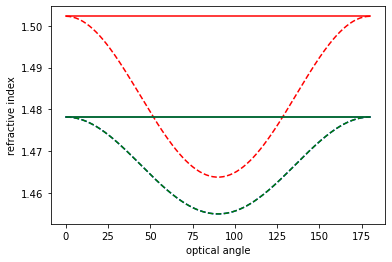

In [6]:
plt.plot(theta_o,n_pf,'r--',n_sf,'b--',n_if,'g--')
plt.plot(theta_o,n_ps,'r',n_ss,'b',n_is,'g')
plt.xlabel('optical angle')
plt.ylabel('refractive index')
plt.show()